# SyriaTel Customer Churn Prediction - Phase 3 Final Project

## Overview

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. They are interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

## Business Understanding

Objective: 
Predict customer churn for SyriaTel and reduce the loss of revenue from customers leaving. We aim to create a model for churn prediction that helps the telecom company design targeted retention strategies.

Stakeholder:
SyriaTel telecommunications company.

Problem:
Customers leave which causes Syriatel to lose money.

Key Questions:
* What are the main factors driving churn?
* Can we identify churn-prone customers in advance?

Success Metrics: 
1. Primary Metric: Recall - to identify potential churners and use strategies to prevent them from churning
2. Secondary Metric: Precision - to avoid overspending on non-churners
3. To evaluate and compare overall performance of our models, we will use AUC-ROC in addition to recall and precision.

## Data Understanding

explain data source and why it is suitable for project

In [1]:
# Import customer information data set from SyriaTel
import pandas as pd

df=pd.read_csv('Data\syriatel_customer_info.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
df.shape

(3333, 21)

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The SyriaTel data set includes 21 features and 3333 customer entries. Since our goal is to predict customer churn, the target variable is churn. We will focus on account activity rather than the customer profile, so we will drop state, area code, and phone number.

Target variable: 
* churn

Fields to include:
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls total eve charge
* total night minutes
* total night calls
* total night charge
* total intl minutes
* total intl calls
* total intl charge
* cusomter service calls

Fields to drop
* state
* area code
* phone number

In [5]:
#check for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null values in this data set

In [6]:
# ensure churn is an integer
df.churn=df.churn.astype(int)

In [7]:
#create x and y variables
y=df['churn']
X=df.drop('churn',axis=1)

### Train-Test Split

In [8]:
# train test split on x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=10)

## Data Preparation

### Dealing with Missing Data

In [9]:
#check for null values
X_train.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

We see here that there are no null values.

### Dealing with Categorical Data

There are a number of categorical variables here: state, phone number, international plan and voice mail plan. Area code is also categorical even though it is an integer here. We can drop this too.

In [10]:
#drop phone number, state, and area code
X_train = X_train.drop(columns=['phone number','state','area code'])
X_test = X_test.drop(columns=['phone number','state','area code'])

In [11]:
X_train_categorical=X_train[['international plan','voice mail plan']]
X_test_categorical=X_test[['international plan','voice mail plan']]

In [12]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
X_train_categorical = X_train[['international plan', 'voice mail plan']]
X_test_categorical = X_test[['international plan', 'voice mail plan']]

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column separately
for col in X_train_categorical.columns:
    X_train_categorical[col] = label_encoder.fit_transform(X_train_categorical[col])

for col in X_test_categorical.columns:
    X_test_categorical[col] = label_encoder.transform(X_test_categorical[col])  # Use transform on test data to avoid data leakage

C:\Users\hrcoh\AppData\Local\Temp\ipykernel_35420\2754222220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical[col] = label_encoder.fit_transform(X_train_categorical[col])
C:\Users\hrcoh\AppData\Local\Temp\ipykernel_35420\2754222220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical[col] = label_encoder.fit_transform(X_train_categorical[col])
C:\Users\hrcoh\AppData\Local\Temp\ipykernel_35420\2754222220.py:15: SettingWithCopyWarning: 
A value is trying to be set o

### Check for MultiCollinearity

In [13]:
#Create dataframe with only numeric features
X_train_numeric=X_train.drop(['international plan','voice mail plan'],axis=1)
X_test_numeric=X_test.drop(['international plan','voice mail plan'],axis=1)

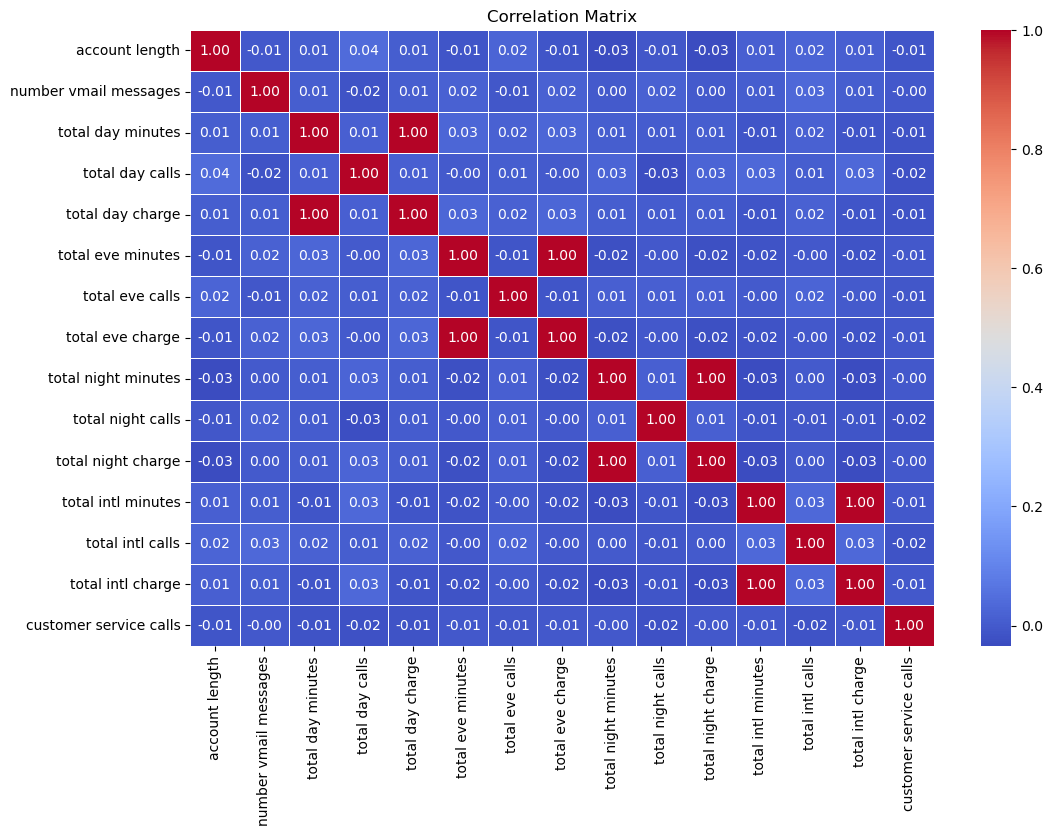

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X_train_numeric.corr()

# Plot heatmap for visual representation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Correlated fields:
* voicemail plan and messages
* total intl minutes and charge
* total night minutes and total night charge
* total eve minutes and total eve charge
* toal day minutes and total day charge

There are many highly correlated fields in the dataset which makes sense because the more minutes you have, the higher your bill will be. Therefore, we will only use 1 of each of the correlated fields. We will keep:
* voicemail plan
* total intl charge
* total night charge
* total eve charge
* total day charge

In [15]:
#drop voice mail messages, total charges
X_train_numeric = X_train_numeric.drop(columns=['number vmail messages','total intl minutes','total day minutes','total eve minutes','total night minutes'])
X_test_numeric = X_test_numeric.drop(columns=['number vmail messages','total intl minutes','total day minutes','total eve minutes','total night minutes'])

In [16]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 2937 to 1289
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   int64  
 1   total day calls         2499 non-null   int64  
 2   total day charge        2499 non-null   float64
 3   total eve calls         2499 non-null   int64  
 4   total eve charge        2499 non-null   float64
 5   total night calls       2499 non-null   int64  
 6   total night charge      2499 non-null   float64
 7   total intl calls        2499 non-null   int64  
 8   total intl charge       2499 non-null   float64
 9   customer service calls  2499 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 214.8 KB


Confirmed we dropped the collinear columns.

### Normalization

So we can compare the variables on the same "scale" we will use MinMaxScaler to normalize the numeric fields.

In [17]:
#Scale using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)

X_train_scaled

,account length,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
2937,0.392562,0.545455,0.313094,0.910256,0.526893,0.639098,0.287307,0.210526,0.709804,0.000000
248,0.384298,0.515152,0.524254,0.551282,0.514862,0.481203,0.621053,0.105263,0.486275,0.444444
592,0.376033,0.515152,0.508311,0.724359,0.187190,0.556391,0.512693,0.052632,0.507843,0.222222
1756,0.483471,0.642424,0.443521,0.634615,0.277070,0.526316,0.263777,0.315789,0.486275,0.111111
1685,0.280992,0.533333,0.414009,0.474359,0.332626,0.375940,0.476161,0.263158,0.572549,0.333333
...,...,...,...,...,...,...,...,...,...,...
3195,0.314050,0.539394,0.608718,0.544872,0.578556,0.548872,0.349226,0.473684,0.513725,0.222222
1344,0.454545,0.539394,0.820047,0.647436,0.378627,0.436090,0.612384,0.421053,0.445098,0.000000
527,0.388430,0.763636,0.117877,0.500000,0.307502,0.436090,0.671827,0.368421,0.629412,0.000000
3197,0.119835,0.648485,0.713365,0.410256,0.435244,0.428571,0.736223,0.105263,0.598039,0.000000


In [18]:
#fit the scaler
scaler.fit(X_test_numeric)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

X_test_scaled

,account length,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
1570,0.495536,0.546875,0.465786,0.529412,0.439277,0.488722,0.675349,0.15,0.864815,0.285714
290,0.883929,0.710938,0.649460,0.582353,0.623954,0.390977,0.726811,0.10,0.400000,0.000000
1768,0.508929,0.625000,0.332876,0.588235,0.626296,0.616541,0.385006,0.10,0.540741,0.285714
101,0.477679,0.835938,0.496999,0.447059,0.537638,0.451128,0.240152,0.25,0.729630,0.000000
705,0.437500,0.398438,0.160521,0.376471,0.657076,0.593985,0.353875,0.25,0.425926,0.142857
...,...,...,...,...,...,...,...,...,...,...
1757,0.183036,0.757812,0.504030,0.552941,0.496487,0.541353,0.343710,0.30,0.600000,0.285714
3210,0.410714,0.656250,0.468187,0.747059,0.784878,0.045113,0.432020,0.15,0.570370,0.142857
182,0.294643,0.632812,0.314183,0.552941,0.675811,0.458647,0.357052,0.60,0.494444,0.285714
2523,0.388393,0.671875,0.397873,0.435294,0.444630,0.360902,0.484752,0.50,0.390741,0.428571


In [19]:
#combine numeric and categorical data again
X_train_full = pd.concat([X_train_scaled, X_train_categorical], axis=1)
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 2937 to 1289
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   float64
 1   total day calls         2499 non-null   float64
 2   total day charge        2499 non-null   float64
 3   total eve calls         2499 non-null   float64
 4   total eve charge        2499 non-null   float64
 5   total night calls       2499 non-null   float64
 6   total night charge      2499 non-null   float64
 7   total intl calls        2499 non-null   float64
 8   total intl charge       2499 non-null   float64
 9   customer service calls  2499 non-null   float64
 10  international plan      2499 non-null   int32  
 11  voice mail plan         2499 non-null   int32  
dtypes: float64(10), int32(2)
memory usage: 234.3 KB


In [20]:
X_test_full = pd.concat([X_test_scaled, X_test_categorical], axis=1)

### Address Class Imbalance
Let's see if there is class imbalance in the target feature (churn). If so, we will have to address this class imbalance

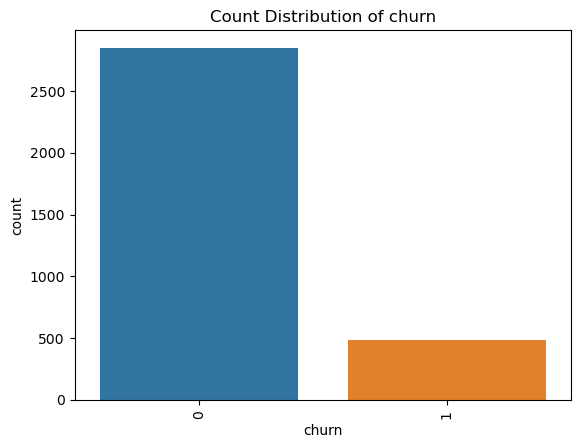

In [21]:
#Address class imbalance with SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()

ax = sns.countplot(data = df, x= 'churn')
ax.set_title(f'Count Distribution of churn')
plt.xticks(rotation= 90)

plt.show()

In [22]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 2937 to 1289
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   float64
 1   total day calls         2499 non-null   float64
 2   total day charge        2499 non-null   float64
 3   total eve calls         2499 non-null   float64
 4   total eve charge        2499 non-null   float64
 5   total night calls       2499 non-null   float64
 6   total night charge      2499 non-null   float64
 7   total intl calls        2499 non-null   float64
 8   total intl charge       2499 non-null   float64
 9   customer service calls  2499 non-null   float64
 10  international plan      2499 non-null   int32  
 11  voice mail plan         2499 non-null   int32  
dtypes: float64(10), int32(2)
memory usage: 234.3 KB


Since there is a class imbalance with fewer customers churning, we will use SMOTE to create synthetic data points for the churn class so that our model can train better.

In [23]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 2937 to 1289
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2499 non-null   float64
 1   total day calls         2499 non-null   float64
 2   total day charge        2499 non-null   float64
 3   total eve calls         2499 non-null   float64
 4   total eve charge        2499 non-null   float64
 5   total night calls       2499 non-null   float64
 6   total night charge      2499 non-null   float64
 7   total intl calls        2499 non-null   float64
 8   total intl charge       2499 non-null   float64
 9   customer service calls  2499 non-null   float64
 10  international plan      2499 non-null   int32  
 11  voice mail plan         2499 non-null   int32  
dtypes: float64(10), int32(2)
memory usage: 234.3 KB


In [24]:
# use SMOTE to address class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train) 

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

-----------------------------------------
Synthetic sample class distribution: 

churn
0    2135
1    2135
Name: count, dtype: int64


C:\Users\hrcoh\anaconda3.0\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\hrcoh\anaconda3.0\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## Analysis and Results

Now that we have pre-processed our data, we can begin exploring our model options to best preduct churn. We will start by using the logistic regression model and evaluating its performance.

In [25]:
#Fit Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_resampled, y_train_resampled)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [26]:
#Performance on Training Data
import numpy as np
y_hat_train = logreg.predict(X_train_resampled)

train_residuals = np.abs(y_train_resampled - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    3194
1    1076
Name: count, dtype: int64

Residuals (proportions)
0    0.748009
1    0.251991
Name: proportion, dtype: float64


This shows that this classifier is about 91% correct on the training data.

In [27]:
#Performance on Test Data
y_hat_test = logreg.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    533
1    301
Name: count, dtype: int64

Residuals (proportions)
0    0.639089
1    0.360911
Name: proportion, dtype: float64


The classifier is also about 62% accurate on the test data.

In [28]:
#Calculate precision, recall, accuracy, and f1
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def evaluation_metrics(y_train, y_hat_train, y_test, y_hat_test):
    # Calculate metrics for training and testing sets
    metrics = {
        "Metric": ["Precision", "Recall", "Accuracy", "F1-Score"],
        "Training": [
            precision_score(y_train, y_hat_train),
            recall_score(y_train, y_hat_train),
            accuracy_score(y_train, y_hat_train),
            f1_score(y_train, y_hat_train),
        ],
        "Testing": [
            precision_score(y_test, y_hat_test),
            recall_score(y_test, y_hat_test),
            accuracy_score(y_test, y_hat_test),
            f1_score(y_test, y_hat_test),
        ],
    }
    
    # Convert to DataFrame
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

# Call the function and store the DataFrame
logreg_evaluation = evaluation_metrics(y_train_resampled, y_hat_train, y_test, y_hat_test)

# Display the DataFrame
print(logreg_evaluation)

      Metric  Training   Testing
0  Precision  0.743225  0.248619
1     Recall  0.757845  0.756303
2   Accuracy  0.748009  0.639089
3   F1-Score  0.750464  0.374220


In [29]:
#ROC and AUC
from sklearn.metrics import roc_curve, auc

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test_full)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [30]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7544690603514133


AUC: 0.7544690603514133


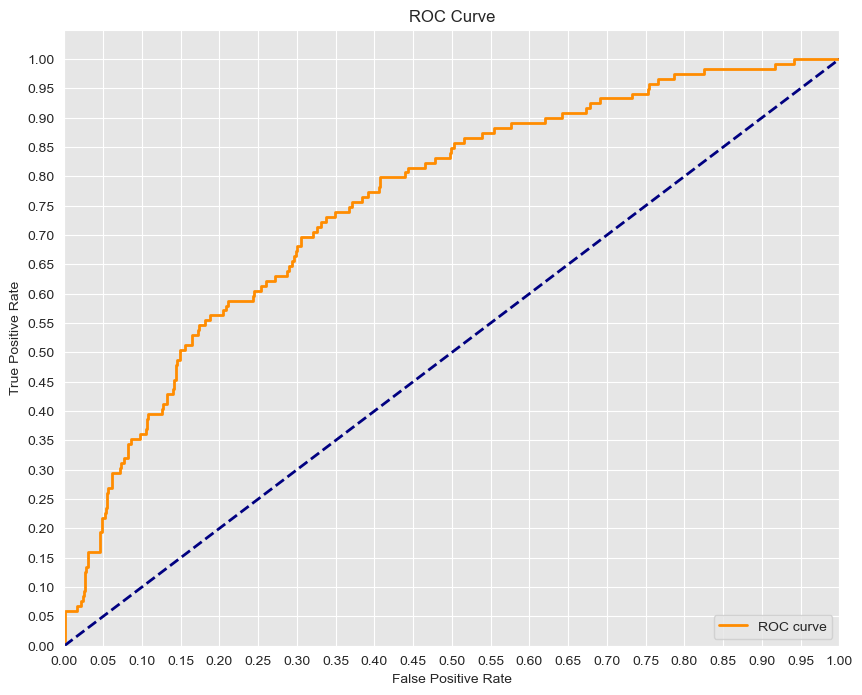

In [31]:
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier Model

Now we will check how a random forest classifier performs.

In [32]:
#Fit the Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=10)
model_forest=forest.fit(X_train_resampled, y_train_resampled)

In [33]:
#Performance on Test Data
y_hat_test = forest.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    710
1    124
Name: count, dtype: int64

Residuals (proportions)
0    0.851319
1    0.148681
Name: proportion, dtype: float64


In [34]:
#Evaluate
random_forest_evaluation=evaluation_metrics(y_train_resampled, y_hat_train, y_test,y_hat_test)

# Display the DataFrame
print(random_forest_evaluation)

      Metric  Training   Testing
0  Precision  0.743225  0.487805
1     Recall  0.757845  0.840336
2   Accuracy  0.748009  0.851319
3   F1-Score  0.750464  0.617284


### Decision Tree Model

Finally, we will check how a decision tree performs on this data.

In [35]:
#Fit the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=10)
model_decision_tree=decision_tree.fit(X_train_resampled, y_train_resampled)

In [36]:
#Performance on Test Data
y_hat_test = decision_tree.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    635
1    199
Name: count, dtype: int64

Residuals (proportions)
0    0.761391
1    0.238609
Name: proportion, dtype: float64


In [37]:
#Evaluate
decision_tree_evaluation = evaluation_metrics(y_train_resampled, y_hat_train, y_test,y_hat_test) 
print(decision_tree_evaluation)

      Metric  Training   Testing
0  Precision  0.743225  0.354015
1     Recall  0.757845  0.815126
2   Accuracy  0.748009  0.761391
3   F1-Score  0.750464  0.493639


### Comparing the 3 Models

We used three different models to predict customer churn. Now we will compare the three models to one another to choose one to recommend to the business. First we will plot ROC curves to compare overall model performance, then we will compare the models' recall, precision, accuracy, and f1 scores.

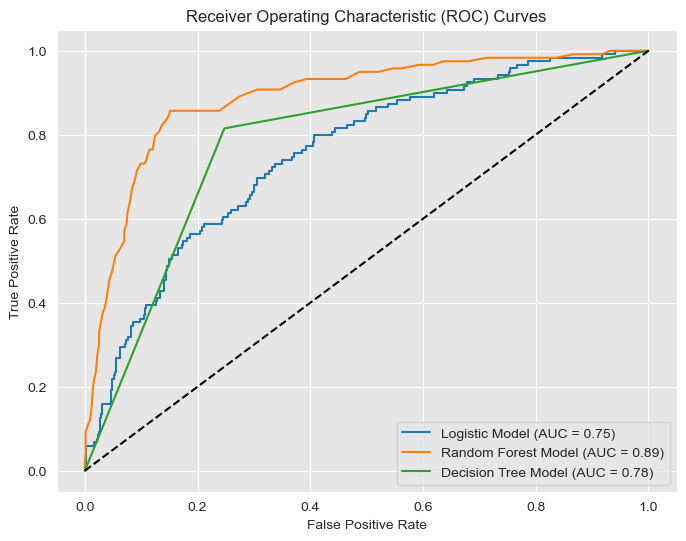

In [38]:
#plot ROC curves
from sklearn.metrics import roc_curve, roc_auc_score

models = [ model_log,model_forest,model_decision_tree]
labels = ['Logistic Model', 'Random Forest Model','Decision Tree Model']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_full)[:, 1]
    else:
        y_probs = model.predict(X_test_full)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

From the ROC curves, it looks like the Random Forest Model is our best performing model with an AUC of .90

In [39]:
#Create data frame combining all models' evaluation scores
logreg_evaluation['Model'] = 'Logistic Regression'
random_forest_evaluation['Model'] = 'Random Forest'
decision_tree_evaluation['Model'] = 'Decision Tree'

# Concatenate them into one DataFrame
all_models_evaluation = pd.concat([logreg_evaluation, random_forest_evaluation, decision_tree_evaluation], ignore_index=True)

# Display the combined DataFrame
print(all_models_evaluation)

       Metric  Training   Testing                Model
0   Precision  0.743225  0.248619  Logistic Regression
1      Recall  0.757845  0.756303  Logistic Regression
2    Accuracy  0.748009  0.639089  Logistic Regression
3    F1-Score  0.750464  0.374220  Logistic Regression
4   Precision  0.743225  0.487805        Random Forest
5      Recall  0.757845  0.840336        Random Forest
6    Accuracy  0.748009  0.851319        Random Forest
7    F1-Score  0.750464  0.617284        Random Forest
8   Precision  0.743225  0.354015        Decision Tree
9      Recall  0.757845  0.815126        Decision Tree
10   Accuracy  0.748009  0.761391        Decision Tree
11   F1-Score  0.750464  0.493639        Decision Tree


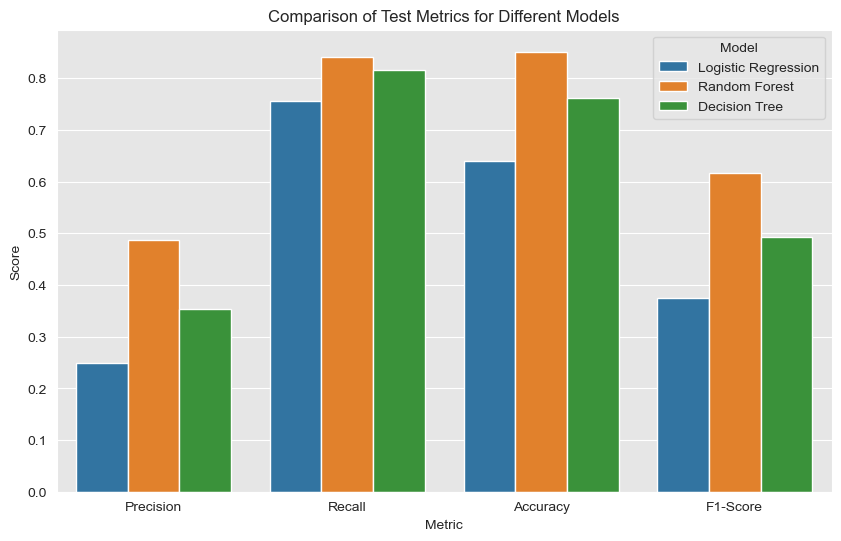

In [40]:
#create bar plot comparing model evaluations

# Filter the DataFrame to keep only the rows corresponding to testing metrics
test_metrics_df = all_models_evaluation[["Metric", "Testing", "Model"]]

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Testing", hue="Model", data=test_metrics_df)
plt.title('Comparison of Test Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

The Random Forest Model performed the best according to all 4 of these metrics: precision, recall, accuracy, and f1. Decision Tree was the second best performing model and Logistic Regression was the third. We will recommend the Random Forest Model to SyriaTel.

### Hyperparameter Tuning - Random Forest

Before we hand over the model to SyriaTel, let's see if we can use hyperparameter tuning to improve the Random Forest Model even more. We will useRandomizedSearchCV to check what the optimal hyperparameters are. We chose this over GridSearchCV to optimize time and company resources.

In [41]:
#Define parameter grid
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500], 
    'max_depth': [5, 10, 20, 30, None],          
    'min_samples_split': [2, 5, 10,15],           
    'min_samples_leaf': [1, 2, 4, 6],             
    'max_features': ['sqrt', 'log2'],         
    'bootstrap': [True, False],
}             

In [42]:
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

In [43]:
#initialize randomized search cv
random_search = RandomizedSearchCV(
    estimator=forest,     
    param_distributions=param_dist,
    n_iter=200,
    scoring='recall',
    cv=stratified_cv,                     
    verbose=2,                
    random_state=10,          
    n_jobs=-1                 
)

In [44]:
# Fit the random search
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=RandomForestClassifier(random_state=10),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=10, scoring='recall', verbose=2)

In [45]:
# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Recall Score: 0.9611241217798595


In [46]:
# Retrieve the best model
best_forest = random_search.best_estimator_

In [47]:
y_hat_test = best_forest.predict(X_test_full)

In [48]:
#Evaluate
best_forest_evaluation = evaluation_metrics(y_train_resampled, y_hat_train, y_test,y_hat_test) 
print(best_forest_evaluation)

      Metric  Training   Testing
0  Precision  0.743225  0.500000
1     Recall  0.757845  0.789916
2   Accuracy  0.748009  0.857314
3   F1-Score  0.750464  0.612378


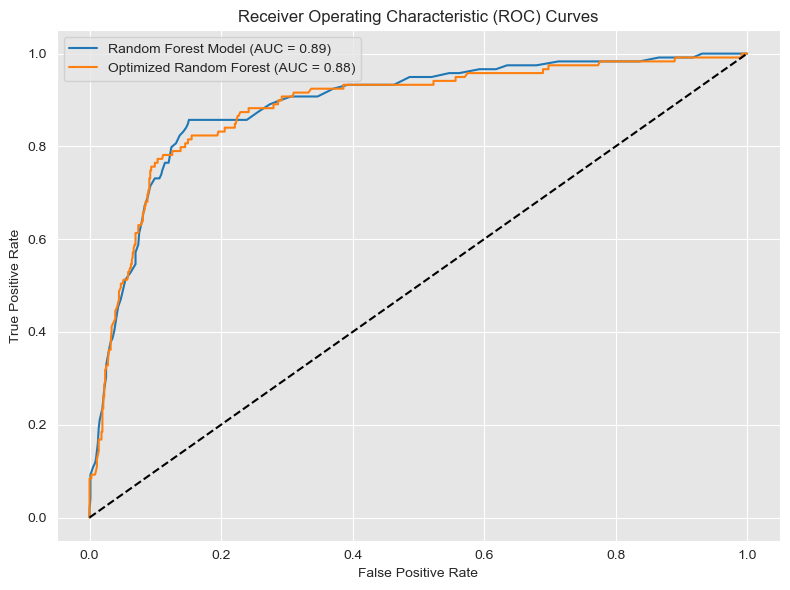

In [49]:
#plot ROC curves
models = [model_forest, best_forest]
labels = ['Random Forest Model','Optimized Random Forest']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_full)[:, 1]
    else:
        y_probs = model.predict(X_test_full)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
#Create data frame combining all models' evaluation scores
random_forest_evaluation['Model'] = 'Random Forest'
best_forest_evaluation['Model'] = 'Optimized Random Forest'

# Concatenate them into one DataFrame
forest_evaluation = pd.concat([random_forest_evaluation, best_forest_evaluation], ignore_index=True)

# Display the combined DataFrame
print(forest_evaluation)

      Metric  Training   Testing                    Model
0  Precision  0.743225  0.487805            Random Forest
1     Recall  0.757845  0.840336            Random Forest
2   Accuracy  0.748009  0.851319            Random Forest
3   F1-Score  0.750464  0.617284            Random Forest
4  Precision  0.743225  0.500000  Optimized Random Forest
5     Recall  0.757845  0.789916  Optimized Random Forest
6   Accuracy  0.748009  0.857314  Optimized Random Forest
7   F1-Score  0.750464  0.612378  Optimized Random Forest


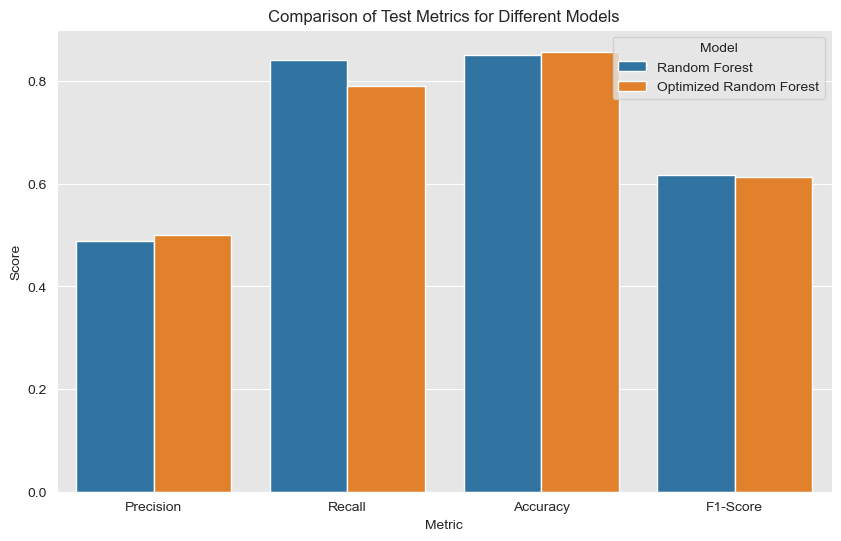

In [51]:
#create bar plot comparing model evaluations

# Filter the DataFrame to keep only the rows corresponding to testing metrics
test_metrics_df = forest_evaluation[["Metric", "Testing", "Model"]]

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Testing", hue="Model", data=test_metrics_df)
plt.title('Comparison of Test Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

It looks like the baseline and optimized model perform similarly so we have to revert to the business question to choose our final model. Because the highest priority is to identify at-risk customers, we will choose the baseline Random Forest model as it has the highest Recall on the testing data (84%). While the optimized version improved slightly in Accuracy, its lower Recall means it could miss more at-risk customers, making the baseline Random Forest the better choice for this goal.

### Feauture Importance

Now we can check which features are most important to the model and therefore the best predictors of customer churn.

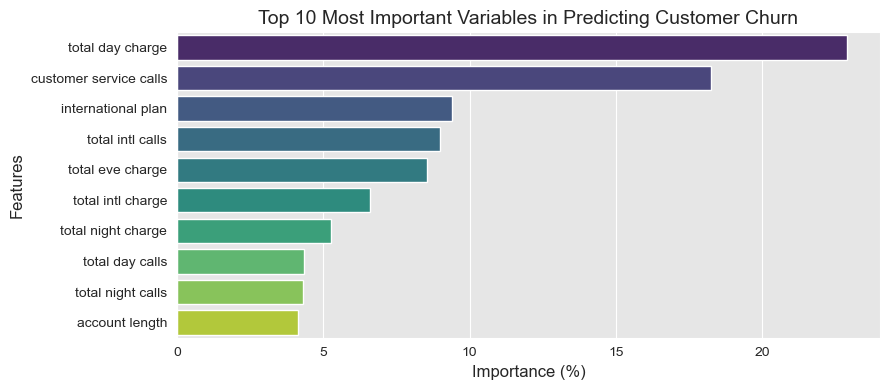

In [56]:
#create feature importance dataset
Importance = pd.DataFrame({"Importance": model_forest.feature_importances_ * 100}, index=X_train_resampled.columns)

# Sort by importance
sorted_importance = Importance.sort_values(by="Importance", axis=0, ascending=False).head(10)

#plot
plt.figure(figsize=(9, 4))
sns.barplot(x=sorted_importance['Importance'], y=sorted_importance.index, palette="viridis")
plt.title("Top 10 Most Important Variables in Predicting Customer Churn", fontsize=14)
plt.xlabel('Importance (%)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

When the feature importance is expressed as a percentage, it represents the relative contribution of each feature to the total importance of all features. The sum of all feature importances in the model will be 100%. The most important features are total day charge, customer service calls, and international plan/ total intl calls.

### Business Recommendation 1 - Address Concerns Related to Customer Service Calls

High customer service calls may indicate unresolved issues or dissatisfaction. Introduce proactive support measures, such as training representatives to resolve issues on the first call or implementing a follow-up system to ensure customer concerns are addressed promptly. This can help reduce frustration and improve retention.

### Business Recommendation 2 - Tailor Offers for High Spending Customers

Customers with higher day charges may feel the service is too expensive or lack perceived value. Create personalized retention strategies for these customers, such as offering loyalty discounts, bundled plans, or value-added services that enhance their experience and justify the cost.

### Business Recommendation 3 - Incentivize and Simplify International Plans

Customers using international plans or making frequent international calls may value affordability and reliability. Offer competitive pricing for international plans, promotional discounts for frequent international callers, or free trials for new plans to encourage continued usage and build loyalty.

## Conclusion

In this project, we successfully built a churn prediction model using Random Forest, which demonstrated strong performance with an 84% Recall, ensuring we effectively identify customers at risk of churning. Key drivers of churn, including total day charge, customer service calls, and international plan usage, informed targeted business recommendations such as enhancing customer service, offering tailored loyalty incentives for high spenders, and optimizing international plans to retain valuable customers. These insights empower SyriaTel to take proactive, data-driven actions to reduce customer churn, minimize revenue loss, and foster stronger customer relationships.

### Next Steps

1. Evaluate Alternative Models for Enhanced Performance
Test other advanced models like Gradient Boosting or ensemble approaches to identify opportunities for better churn prediction accuracy and Recall.

2. Optimize Hyperparameter Tuning for Improved Results
Refine the hyperparameter search strategy using more granular or advanced optimization methods to further improve model performance.

3. Incorporate Customer Demographics into Analysis
Include features like area code and state to explore how customer profiles influence churn, enabling more tailored retention strategies.